# LinearRegression 一元线性回归

In [ ]:
from sklearn.linear_model import LinearRegression


X = [[10.0], [8.0], [13.0], [9.0], [11.0], [14.0], [6.0], [4.0], [12.0], [7.0], [5.0]]
y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
model = LinearRegression()
model.fit(X, y) 
print(model.intercept_) # 截距 
print(model.coef_) # 斜率
y_pred = model.predict([[0], [1],[15]]) 
print(y_pred) # 对x=0, x=1的预测结果

## 一元线性回归绘图

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

plt.scatter(X, y)

weight=model.coef_#获取斜率w1,w2,w3,...,wn
bias=model.intercept_#获取截距w0
print(weight)
print(bias)

x_plot=np.arange(0,15,0.2)
y_plot=weight*x_plot+bias
y_plot_predict=model.predict(np.array(x_plot).reshape(-1, 1) )

plt.plot(x_plot, y_plot)
plt.plot(x_plot, y_plot_predict)

# [Anscombe's Quartet 安斯库姆.四重奏](https://zhuanlan.zhihu.com/p/413824758)



In [ ]:
import numpy as np
import pandas as pd
#from pandas import Series
#from pandas import DataFrame



'''
link: https://www.kaggle.com/carlmcbrideellis/data-anscombes-quartet

This file consists of four data sets of 11 points each. 
Note the peculiarity that the same 'x' values are used for the first three data sets, 
and I have followed this exactly as in the original publication (originally done to save space), 
i.e. the first column (x123) serves as the 'x' for the next three 'y' columns.
'''

df = pd.read_csv('Anscombe_quartet_data.csv') 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

print(df)

## 4重奏数据的统计特性

In [ ]:
x1=df.loc[:,'x123']
y1=df.loc[:,'y1']
x2=df.loc[:,'x123']
y2=df.loc[:,'y2']
x3=df.loc[:,'x123']
y3=df.loc[:,'y3']
x4=df.loc[:,'x4']
y4=df.loc[:,'y4']
#print(x2)
#print(y2)

for x,y in zip([x1,x2,x3,x4],[y1,y2,y3,y4]):
    print(np.transpose(x).tolist())
    print(np.transpose(y).tolist()) # 转置打印
    print("x平均数为%.2f"%np.mean(x),"方差为%.2f"%np.var(x),"y平均数为%.2f"%np.mean(y),"方差为%.2f"%np.var(y),"xy的相关系数分别为%.2f"%x.corr(y))


## 4重奏图

In [ ]:
import matplotlib.pyplot as plt
from sklearn import linear_model

model = linear_model.LinearRegression()

for x,y in zip([x1,x2,x3,x4],[y1,y2,y3,y4]):
    x_2d=np.array(x).reshape(-1,1)
    y_2d=np.array(y).reshape(-1,1)

    model.fit (x_2d,y_2d)
    weight=model.coef_
    bias=model.intercept_
    print("直线的斜率为%.3f"%weight,"直线的截距为%.3f"%bias)
    plt.scatter(x,y)
    y_pred=model.predict(x_2d)
    plt.plot(x, y_pred)

plt.show()



## 多元线性回归

In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



X_2D=np.array(X).reshape(-1,1)
y_2D=np.array(y).reshape(-1,1)

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

x_data = X
y_data = y

model = LinearRegression().fit(x_data,y_data)
model.score(X, y)
print(model.coef_)
print('bias={0}  W0={1}  W1={2}'.format(model.intercept_,model.coef_[0],model.coef_[1]))


[1. 2.]
bias=3.0000000000000018  W0=1.0000000000000002  W1=1.9999999999999991


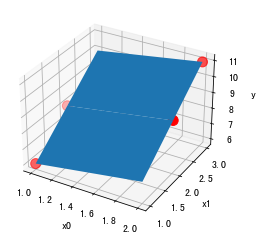

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
#https://matplotlib.org/stable/api/figure_api.html?highlight=add_subplot#matplotlib.figure.Figure.add_subplot

x0 = x_data[:,0]
x1 = x_data[:,1]
ax.scatter(x0, x1, y_data,marker='o',c='r',s=100)

x0,x1 = np.meshgrid(x0,x1)
z = model.intercept_ + model.coef_[0]*x0 + model.coef_[1]*x1

ax.plot_surface(x0,x1,z)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.show()